In [2]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

In [16]:
df_iris=pd.read_csv("iris_teach_2.csv")
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
148                6.7               3.0                5.2               2.3   
149                6.3               2.5                5.0               1.9   
150                6.5               3.0                5.2               2.0   
151                6.2               3.4                5.4               2.3   
152                5.9               3.0                5.1               1.8   

     iris_name  
0       se

In [17]:
df_iris.isnull().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

In [18]:
df_iris.dropna(inplace=True)
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [19]:
X=df_iris.drop("iris_name", axis=1)
y=df_iris["iris_name"]
print(y)
print(X)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
148    virginica
149    virginica
150    virginica
151    virginica
152    virginica
Name: iris_name, Length: 150, dtype: object
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
148                6.7               3.0                5.2               2.3
149                6.3               2.5                5.0               1.9
150                6.5               3.0                5.2        

In [20]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [22]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [23]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


In [25]:
# Visualize the decision tree 
plot_tree(tree_clf)

[Text(0.3333333333333333, 0.9375, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2777777777777778, 0.875, 'True  '),
 Text(0.4444444444444444, 0.8125, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.38888888888888884, 0.875, '  False'),
 Text(0.2222222222222222, 0.6875, 'x[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'x[2] <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.5555555555555556, 0.5625, 'x[3] <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]'),
 Text(0.3333333333333333, 0.4375, 'x[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'e

In [26]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 6}


In [27]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

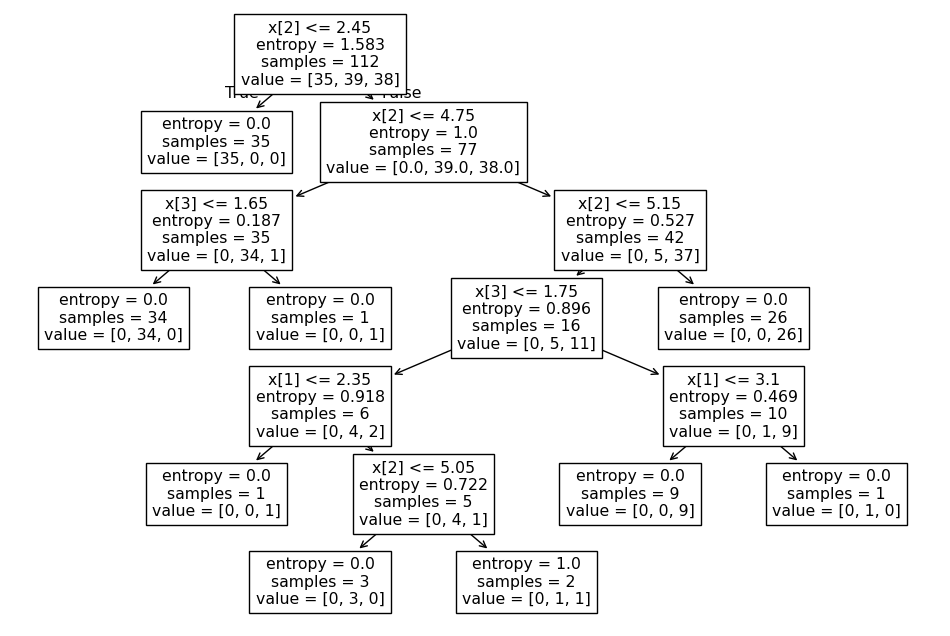

In [29]:
# Visualize the decision tree 
%matplotlib inline
plt.figure(figsize=(12, 8))
plot_tree(tree_clf_tuned)
plt.show()

In [43]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=y
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


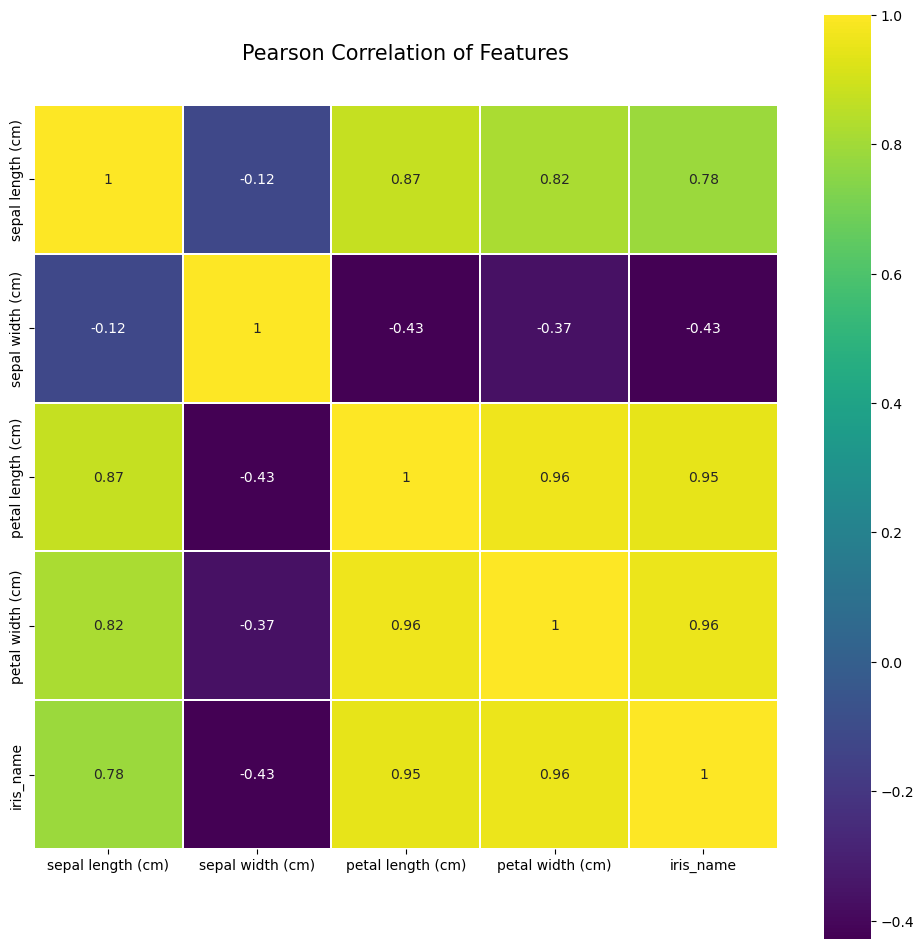

In [24]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Accuracy: 0.84


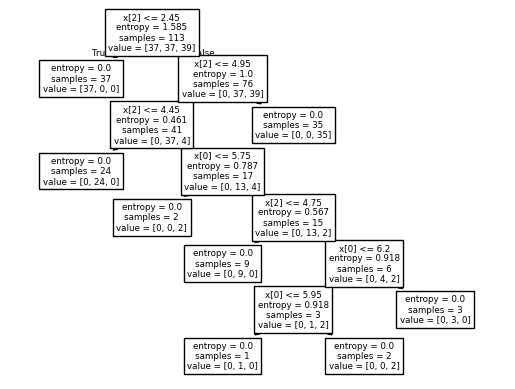

In [4]:
df_iris=pd.read_csv("iris_teach_2.csv")
df_iris.drop('petal width (cm)', axis=1, inplace=True)
df_iris.dropna(inplace=True)
X = df_iris.drop('iris_name', axis=1)
y = df_iris['iris_name']

encode=LabelEncoder()
y=encode.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

# Visualize the decision tree 
plot_tree(tree_clf)
plt.show()

Best hyperparameters: {'max_depth': 2}


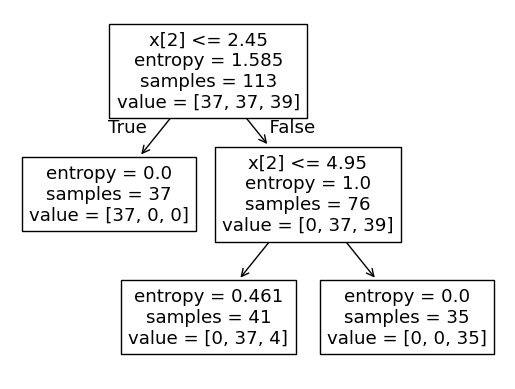

Accuracy: 0.89


In [5]:
df_iris=pd.read_csv("iris_teach_2.csv")
df_iris.drop('petal width (cm)', axis=1, inplace=True)
df_iris.dropna(inplace=True)
X = df_iris.drop('iris_name', axis=1)
y = df_iris['iris_name']

encode=LabelEncoder()
y=encode.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=grid_search.best_params_['max_depth'], random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)
plt.show()
# make predictions on the test set 
y_pred = tree_clf_tuned.predict(X_test) 
# calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))